In [39]:
import requests                           # For sending HTTP requests and fetching data from websites.
import pandas as pd                       # For data manipulation and analysis with DataFrame structures.
import re                                 # For working with regular expressions for pattern matching and text processing.
from IPython.display import display, HTML # For displaying rich content in IPython environments.
import seaborn as sns                     # For creating attractive and informative statistical graphics.
import matplotlib.pyplot as plt           # For creating plots and visualizations.
import matplotlib.colors as mcolors       # For working with colors in Matplotlib plots.
import numpy as np                        # For numerical computations and data manipulation with arrays.

## Data Import

In [33]:
url = 'https://cdn.jsdelivr.net/gh/akabab/superhero-api@0.3.0/api/all.json'

response = requests.get(url)

all_superheroes_data = response.json()
df = pd.DataFrame(all_superheroes_data)

In [35]:
df = pd.DataFrame(all_superheroes_data)
    
df_powerstats = pd.json_normalize(df['powerstats'])
df_powerstats.columns = [f'powerstats_{col}' for col in df_powerstats.columns]
    
df_appearance = pd.json_normalize(df['appearance'])
df_appearance.columns = [f'appearance_{col}' for col in df_appearance.columns]
    
df_biography = pd.json_normalize(df['biography'])
df_biography.columns = [f'biography_{col}' for col in df_biography.columns]
    
df_work = pd.json_normalize(df['work'])
df_work.columns = [f'work_{col}' for col in df_work.columns]
    
df_connections = pd.json_normalize(df['connections'])
df_connections.columns = [f'connections_{col}' for col in df_connections.columns]
    
df_images = pd.json_normalize(df['images'])
df_images.columns = [f'images_{col}' for col in df_images.columns]
    
df = pd.concat([df, df_powerstats, df_appearance, df_biography, df_work, df_connections, df_images], axis=1)
    
df.drop(['powerstats', 'appearance', 'biography', 'work', 'connections', 'images'], axis=1, inplace=True)

## Data Cleaning

In [33]:
#Summary
#Drop Columns
#Check NaN Values
#replace NaN values with unknown
#Check Duplicates

In [34]:
df.drop(['images_xs', 'images_sm', 'images_md'], axis=1, inplace=True)

In [7]:
df_cleaned = df.drop(['slug', 'connections_relatives', 'biography_aliases', 'biography_placeOfBirth','appearance_hairColor', 'appearance_eyeColor', 'biography_alterEgos'], axis=1)

In [9]:
df_cleaned.columns

Index(['id', 'name', 'powerstats_intelligence', 'powerstats_strength',
       'powerstats_speed', 'powerstats_durability', 'powerstats_power',
       'powerstats_combat', 'appearance_gender', 'appearance_race',
       'appearance_height', 'appearance_weight', 'biography_fullName',
       'biography_firstAppearance', 'biography_publisher',
       'biography_alignment', 'work_occupation', 'work_base',
       'connections_groupAffiliation', 'images_lg'],
      dtype='object')

In [10]:
unique_values_per_column = {}

for col in df_cleaned.columns:
    if df_cleaned[col].apply(type).eq(list).any():
        flattened_values = [item for sublist in df_cleaned[col] for item in sublist]
        unique_values_per_column[col] = set(flattened_values)
    else:
        unique_values_per_column[col] = df_cleaned[col].unique()

unique_values_per_column

{'id': array([  1,   2,   3,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,
         15,  17,  18,  20,  23,  24,  25,  26,  28,  29,  30,  31,  32,
         34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  48,
         49,  52,  53,  56,  57,  58,  60,  61,  62,  63,  66,  68,  69,
         70,  71,  72,  73,  75,  76,  78,  79,  80,  81,  82,  83,  84,
         87,  88,  92,  93,  95,  96,  97,  98,  99, 100, 102, 103, 104,
        105, 106, 107, 109, 110, 111, 112, 114, 115, 118, 119, 120, 121,
        126, 127, 130, 135, 136, 137, 139, 140, 141, 142, 144, 145, 146,
        147, 148, 149, 150, 151, 152, 154, 156, 157, 158, 160, 162, 165,
        167, 169, 170, 171, 172, 174, 176, 177, 178, 180, 181, 185, 186,
        188, 191, 194, 195, 196, 198, 200, 201, 202, 203, 204, 206, 207,
        208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
        221, 222, 224, 225, 226, 227, 228, 230, 231, 232, 233, 234, 235,
        236, 237, 238, 239, 240, 241, 242, 24

In [11]:
nunique_values_per_column = {}

for col, values in unique_values_per_column.items():
    nunique_values_per_column[col] = len(values)

nunique_values_per_column

{'id': 563,
 'name': 555,
 'powerstats_intelligence': 19,
 'powerstats_strength': 58,
 'powerstats_speed': 43,
 'powerstats_durability': 41,
 'powerstats_power': 95,
 'powerstats_combat': 38,
 'appearance_gender': 3,
 'appearance_race': 62,
 'appearance_height': 118,
 'appearance_weight': 294,
 'biography_fullName': 490,
 'biography_firstAppearance': 472,
 'biography_publisher': 69,
 'biography_alignment': 4,
 'work_occupation': 328,
 'work_base': 245,
 'connections_groupAffiliation': 422,
 'images_lg': 558}

In [12]:
df_cleaned.isnull().sum()

id                                0
name                              0
powerstats_intelligence           0
powerstats_strength               0
powerstats_speed                  0
powerstats_durability             0
powerstats_power                  0
powerstats_combat                 0
appearance_gender                 0
appearance_race                 164
appearance_height                 0
appearance_weight                 0
biography_fullName                0
biography_firstAppearance         0
biography_publisher               6
biography_alignment               0
work_occupation                   0
work_base                         0
connections_groupAffiliation      0
images_lg                         0
dtype: int64

In [13]:
df_cleaned['appearance_race'] = df_cleaned['appearance_race'].fillna('unknown')

In [14]:
df_cleaned['biography_publisher'] = df_cleaned['biography_publisher'].fillna('unknown')

In [15]:
for col in df_cleaned.columns:
    if df_cleaned[col].apply(type).eq(list).any():
        df_cleaned[col] = df_cleaned[col].apply(tuple)

duplicate_rows = df_cleaned.duplicated()

num_duplicates = duplicate_rows.sum()

print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [16]:
df_cleaned['name'].duplicated().sum()

8

In [17]:
df_cleaned['id'].duplicated().sum()

0

In [18]:
duplicates_in_column = df_cleaned[df_cleaned['name'].duplicated(keep=False)]

In [19]:
display(df_cleaned)

id             name  powerstats_intelligence  powerstats_strength  \
0      1           A-Bomb                       38                  100   
1      2       Abe Sapien                       88                   28   
2      3         Abin Sur                       50                   90   
3      4      Abomination                       63                   80   
4      5          Abraxas                       88                   63   
..   ...              ...                      ...                  ...   
558  727  Yellowjacket II                       50                   10   
559  728             Ymir                       50                  100   
560  729             Yoda                       88                   52   
561  730          Zatanna                       81                   10   
562  731             Zoom                       50                   10   

     powerstats_speed  powerstats_durability  powerstats_power  \
0                  17                     80                24   
1                  35                     65               100   
2                  53                     64                99   
3                  53                     90                62   
4                  83                    100               100   
..                ...                    ...               ...   
558                35                     28                31   
559                27                    100                98   
560                33                     25               100   
561                23                     28               100   
562               100                     28               100   

     powerstats_combat appearance_gender    appearance_race  \
0                   64              Male              Human   
1                   85              Male      Icthyo Sapien   
2                   65              Male            Ungaran   
3                   95              Male  Human / Radiation   
4                   55              Male      Cosmic Entity   
..                 ...               ...                ...   
558                 28            Female              Human   
559                 28              Male        Frost Giant   
560                 90              Male     Yoda's species   
561                 56            Female              Human   
562                 28              Male            unknown   

        appearance_height appearance_weight      biography_fullName  \
0           (6'8, 203 cm)  (980 lb, 441 kg)  Richard Milhouse Jones   
1           (6'3, 191 cm)   (145 lb, 65 kg)          Abraham Sapien   
2           (6'1, 185 cm)   (200 lb, 90 kg)                           
3           (6'8, 203 cm)  (980 lb, 441 kg)            Emil Blonsky   
4               (-, 0 cm)      (- lb, 0 kg)                 Abraxas   
..                    ...               ...                     ...   
558         (5'5, 165 cm)   (115 lb, 52 kg)             Rita DeMara   
559  (1000, 304.8 meters)      (- lb, 0 kg)                    Ymir   
560          (2'2, 66 cm)    (38 lb, 17 kg)                    Yoda   
561         (5'7, 170 cm)   (127 lb, 57 kg)          Zatanna Zatara   
562         (6'1, 185 cm)   (181 lb, 81 kg)          Hunter Zolomon   

                             biography_firstAppearance biography_publisher  \
0              Hulk Vol 2 #2 (April, 2008) (as A-Bomb)       Marvel Comics   
1                  Hellboy: Seed of Destruction (1993)   Dark Horse Comics   
2                         Showcase #22 (October, 1959)           DC Comics   
3                                Tales to Astonish #90       Marvel Comics   
4                          Fantastic Four Annual #2001       Marvel Comics   
..                                                 ...                 ...   
558                                      Avengers #264       Marvel Comics   
559                           JOURNEY INTO MYSTERY #97       Marvel Comics   


## Data Formatting

In [20]:
#Summary
#Format height and weight to kg and cm
#replace biography_alignment values with emojis
#Set everything to capitalize letters
#Set the ID columns as index
#Create a mapping to change all column names
#Replace all 0 cm and kg with unknown

In [21]:
df_cleaned_formatted = df_cleaned.copy()

In [22]:
def extract_value(cell):
    return cell[1]

df_cleaned_formatted['appearance_height'] = df_cleaned_formatted['appearance_height'].apply(extract_value)
df_cleaned_formatted['appearance_weight'] = df_cleaned_formatted['appearance_weight'].apply(extract_value)

In [23]:
alignment_emojis = {
    'good': 'üòá',
    'neutral': 'üòê',
    'bad': 'üòà',
    '-': 'üòê'
}

df_cleaned_formatted['biography_alignment'] = df_cleaned_formatted['biography_alignment'].replace(alignment_emojis)

In [24]:
def capitalize_words(sentence):
    return ' '.join(word.capitalize() for word in sentence.split())

df_cleaned_formatted = df_cleaned_formatted.apply(lambda x: x.map(lambda x: capitalize_words(x) if isinstance(x, str) else x))

In [25]:
df_cleaned_formatted.set_index('id', inplace=True)
df_cleaned_formatted.index.name = 'id'

In [42]:
column_name_mapping = {
    'appearance_gender': 'Gender',
    'appearance_race': 'Race',
    'appearance_height': 'Height',
    'appearance_weight': 'Weight',
    'biography_fullName': 'Full Name',
    'biography_firstAppearance': 'First Appearance',
    'biography_publisher': 'Publisher',
    'biography_alignment': 'Alignment',
    'name': 'Name',
    'powerstats_intelligence': 'PS Intelligence',
    'powerstats_strength': 'PS Strength',
    'powerstats_speed': 'PS Speed',
    'powerstats_durability': 'PS Durability',
    'powerstats_power': 'PS Power',
    'powerstats_combat': 'PS Combat',
    'work_occupation': 'Occupation',
    'work_base': 'Base',
    'connections_groupAffiliation': 'Affiliation',
    'images_lg': 'Image'
}

df_cleaned_formatted.rename(columns=column_name_mapping, inplace=True)

In [ ]:
skills_columns = ['PS Intelligence', 'PS Strength', 'PS Speed', 'PS Durability', 'PS Power', 'PS Combat']

df_cleaned_formatted.insert(7, 'Overall PS', df_cleaned_formatted[skills_columns].sum(axis=1))

In [28]:
df_cleaned_formatted['Height'] = df_cleaned_formatted['Height'].replace('0 Cm', 'Unknown')
df_cleaned_formatted['Weight'] = df_cleaned_formatted['Weight'].replace('0 Kg', 'Unknown')
df_cleaned_formatted['Publisher'] = df_cleaned_formatted['Publisher'].replace('', 'Unknown')

In [41]:
display(df_cleaned_formatted)

Name  PS Intelligence  PS Strength  PS Speed  PS Durability  \
id                                                                            
1             A-bomb               38          100        17             80   
2         Abe Sapien               88           28        35             65   
3           Abin Sur               50           90        53             64   
4        Abomination               63           80        53             90   
5            Abraxas               88           63        83            100   
..               ...              ...          ...       ...            ...   
727  Yellowjacket Ii               50           10        35             28   
728             Ymir               50          100        27            100   
729             Yoda               88           52        33             25   
730          Zatanna               81           10        23             28   
731             Zoom               50           10       100             28   

     PS Power  PS Combat  Overall PS  Gender               Race  ...   Weight  \
id                                                               ...            
1          24         64         323    Male              Human  ...   441 Kg   
2         100         85         401    Male      Icthyo Sapien  ...    65 Kg   
3          99         65         421    Male            Ungaran  ...    90 Kg   
4          62         95         443    Male  Human / Radiation  ...   441 Kg   
5         100         55         489    Male      Cosmic Entity  ...  Unknown   
..        ...        ...         ...     ...                ...  ...      ...   
727        31         28         182  Female              Human  ...    52 Kg   
728        98         28         403    Male        Frost Giant  ...  Unknown   
729       100         90         388    Male     Yoda's Species  ...    17 Kg   
730       100         56         298  Female              Human  ...    57 Kg   
731       100         28         316    Male            Unknown  ...    81 Kg   

                  Full Name  \
id                            
1    Richard Milhouse Jones   
2            Abraham Sapien   
3                             
4              Emil Blonsky   
5                   Abraxas   
..                      ...   
727             Rita Demara   
728                    Ymir   
729                    Yoda   
730          Zatanna Zatara   
731          Hunter Zolomon   

                                      First Appearance          Publisher  \
id                                                                          
1              Hulk Vol 2 #2 (april, 2008) (as A-bomb)      Marvel Comics   
2                  Hellboy: Seed Of Destruction (1993)  Dark Horse Comics   
3                         Showcase #22 (october, 1959)          Dc Comics   
4                                Tales To Astonish #90      Marvel Comics   
5                          Fantastic Four Annual #2001      Marvel Comics   
..                                                 ...                ...   
727                                      Avengers #264      Marvel Comics   
728                           Journey Into Mystery #97      Marvel Comics   
729  Star Wars: Episode V - The Empire Strikes Back...       George Lucas   
730                                         Hawkman #4          Dc Comics   
731                              Flash Secret Files #3          Dc Comics   

    Alignment                                         Occupation  \
id                                                                 
1           üòá  Musician, Adventurer, Author; Formerly Talk Sh...   
2           üòá                            Paranormal Investigator   
3           üòá            Green Lantern, Former History Professor   
4           üòà                                             Ex-spy   
5           üòà                              Dimensional Destroyer   
..        ...                        

In [40]:
def extract_year(appearance):
    year_pattern = r'\b\d{4}\b'
    match = re.search(year_pattern, appearance)
    
    if match:
        return match.group()
    else:
        return None

if 'First Appearance' in df_cleaned_formatted.columns:
    df_cleaned_formatted['Year'] = df_cleaned_formatted['First Appearance'].apply(extract_year)
else:
    print("not found")


In [92]:
df.to_csv(r'C:\Users\√âlio Vieira\Desktop\IronHack\Classes\Unit 3 - First Project\Project\data\raw.csv')
df_cleaned_formatted.to_csv(r'C:\Users\√âlio Vieira\Desktop\IronHack\Classes\Unit 3 - First Project\Project\data\cleaned.csv')

## Filtering Data

In [44]:
#Summary
#Filter top 10 strongest characters
#And display with images
#create a function to call the top 10 of everything
#create a function to call the top 10 of everything with conditions

In [45]:
top_10_overall_ps = df_cleaned_formatted.nlargest(10, 'Overall PS')

image_column = top_10_overall_ps.pop('Image')
top_10_overall_ps.insert(1, 'Image', image_column) 

def render_image(url):
    return f'<img src="{url}" style="max-width:75px; height:auto;">'

top_10_overall_ps['Image'] = top_10_overall_ps['Image'].apply(render_image)

html = top_10_overall_ps.to_html(escape=False)

display(HTML(html))


In [46]:
def get_top_10(df, column_name):
    top_10 = df.nlargest(10, column_name)
    
    image_column = top_10.pop('Image')
    top_10.insert(1, 'Image', image_column) 

    def render_image(url):
        return f'<img src="{url}" style="max-width:75px; height:auto;">'

    top_10['Image'] = top_10['Image'].apply(render_image)

    html = top_10.to_html(escape=False)

    display(HTML(html))

get_top_10(df_cleaned_formatted, 'Overall PS')

In [88]:
def get_top_10_with_condition(df, column_name, condition_column, condition_values):
    filtered_df = df[df[condition_column].isin(condition_values)]
    
    top_10 = filtered_df.nlargest(10, column_name)
    
    image_column = top_10.pop('Image')
    top_10.insert(1, 'Image', image_column) 

    def render_image(url):
        return f'<img src="{url}" style="max-width:75px; height:auto;">'

    top_10['Image'] = top_10['Image'].apply(render_image)

    html = top_10.to_html(escape=False)

    display(HTML(html))

get_top_10_with_condition(df_cleaned_formatted, 'Overall PS', 'Race', ['Human', 'Human / Radiation', 'Mutant'])

In [63]:
df_cleaned_formatted.Year.unique()

array(['2008', '1993', '1959', None, '2001', '1964', '1986', '2007',
       '1998', '1940', '1943', '1979', '1960', '1969', '1965', '1968',
       '1962', '1941', '1963', '1987', '2004', '2003', '1967', '2006',
       '2009', '1991', '1958', '1945', '1947', '1977', '1966', '1990',
       '1975', '1994', '1973', '2005', '2099', '1976', '1982', '2012',
       '1995', '1985', '1980', '2010', '1970', '1999', '1950', '1974',
       '1992', '1972', '1971', '2011', '1978', '1956', '1944', '1954',
       '1981', '1961', '1989', '1984', '1953', '2013', '1997', '2000',
       '1983', '1933', '1955', '2015', '1939', '1996', '1948'],
      dtype=object)

In [64]:
df_cleaned_formatted['Year'].value_counts().head(20)

Year
1964    19
1963    18
2004    11
1965    11
1977    10
1975    10
1976    10
1972     9
1986     9
1941     9
1994     8
1980     8
1985     8
1987     8
1967     7
1993     7
1960     7
1979     7
1940     7
1992     7
Name: count, dtype: int64

In [65]:
df_cleaned_formatted['Year'].value_counts()

Year
1964    19
1963    18
2004    11
1965    11
1977    10
        ..
1953     1
1945     1
1950     1
1956     1
1948     1
Name: count, Length: 70, dtype: int64

## Summary Statistics

In [53]:
top_10_overall_ps.describe().round()

PS Intelligence  PS Strength  PS Speed  PS Durability  PS Power  \
count             10.0         10.0      10.0           10.0      10.0   
mean              96.0        100.0      97.0          100.0     100.0   
std                3.0          2.0       6.0            0.0       0.0   
min               94.0         95.0      83.0          100.0     100.0   
25%               94.0        100.0      97.0          100.0     100.0   
50%               94.0        100.0     100.0          100.0     100.0   
75%              100.0        100.0     100.0          100.0     100.0   
max              100.0        100.0     100.0          100.0     100.0   

       PS Combat  Overall PS  
count       10.0        10.0  
mean        88.0       581.0  
std         10.0        11.0  
min         75.0       569.0  
25%         84.0       573.0  
50%         85.0       579.0  
75%         99.0       585.0  
max        100.0       600.0

In [54]:
top_10_overall_ps.describe(include=["O"])

Name                                              Image  \
count                10                                                 10   
unique               10                                                 10   
top     Man Of Miracles  <img src="Https://cdn.jsdelivr.net/gh/akabab/s...   
freq                  1                                                  1   

       Gender        Race   Height   Weight Full Name First Appearance  \
count      10          10       10       10        10               10   
unique      3           5        6        7         7               10   
top      Male  Kryptonian  Unknown  Unknown                  Spawn #75   
freq        6           5        4        4         4                1   

        Publisher Alignment Occupation Base Affiliation  Year  
count          10        10         10   10          10     4  
unique          4         3          4    4           8     4  
top     Dc Comics         üòá          -    -           -  1985  
freq            6         5          7    6           3     1

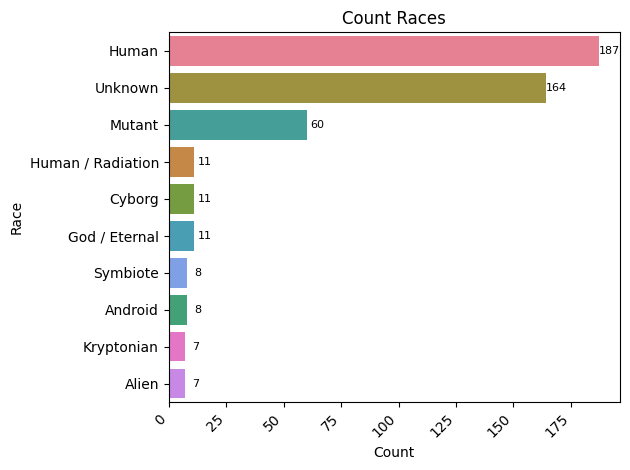

In [73]:
def plot_top_values(df, column_name, top_n=10, palette='husl'):
   
    top_values = df[column_name].value_counts().nlargest(top_n).index
    
    df_top_values = df[df[column_name].isin(top_values)]
    
    unique_values = len(top_values)
    custom_palette = sns.color_palette(palette, unique_values)
    
    sns.countplot(y=column_name, data=df_top_values, hue=column_name, order=top_values, palette=custom_palette, legend=False)
    plt.title(f'Count {column_name}s')
    plt.ylabel(column_name)
    plt.xlabel('Count')
    plt.xticks(rotation=45, ha='right')
    
    for p in plt.gca().patches:
        plt.gca().annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                           ha='center', va='center', fontsize=8, color='black', xytext=(8, 0),
                           textcoords='offset points')
    
    plt.tight_layout()
    plt.show()

plot_top_values(df_cleaned_formatted, 'Race')



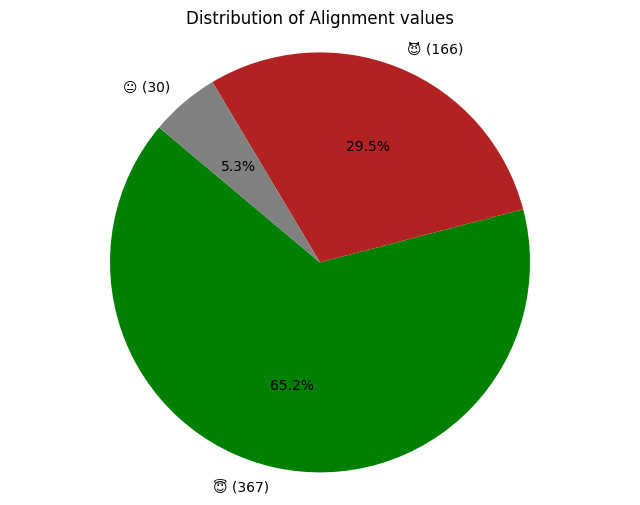

In [56]:
def generate_pie_chart(df, column_name, colors=None):
    value_counts = df[column_name].value_counts()
    
    labels = value_counts.index
    counts = value_counts.values
    
    if colors is None:
        colors = plt.cm.tab20.colors[:len(labels)]
    
    plt.figure(figsize=(8, 6))
    wedges, texts, autotexts = plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    
    for i, label in enumerate(labels):
        texts[i].set_text(f'{label} ({counts[i]})')

    plt.title(f'Distribution of {column_name} values')
    plt.axis('equal') 
    plt.show()

generate_pie_chart(df_cleaned_formatted, 'Alignment', colors=['green', 'firebrick', 'gray', 'orange'])



In [57]:


all_colors = list(mcolors.CSS4_COLORS.keys())

display(all_colors)

['aliceblue',
 'antiquewhite',
 'aqua',
 'aquamarine',
 'azure',
 'beige',
 'bisque',
 'black',
 'blanchedalmond',
 'blue',
 'blueviolet',
 'brown',
 'burlywood',
 'cadetblue',
 'chartreuse',
 'chocolate',
 'coral',
 'cornflowerblue',
 'cornsilk',
 'crimson',
 'cyan',
 'darkblue',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgreen',
 'darkgrey',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet',
 'deeppink',
 'deepskyblue',
 'dimgray',
 'dimgrey',
 'dodgerblue',
 'firebrick',
 'floralwhite',
 'forestgreen',
 'fuchsia',
 'gainsboro',
 'ghostwhite',
 'gold',
 'goldenrod',
 'gray',
 'green',
 'greenyellow',
 'grey',
 'honeydew',
 'hotpink',
 'indianred',
 'indigo',
 'ivory',
 'khaki',
 'lavender',
 'lavenderblush',
 'lawngreen',
 'lemonchiffon',
 'lightblue',
 'lightcoral',
 'lightcyan',
 'lightgoldenrodyellow',
 'lightgray',
 

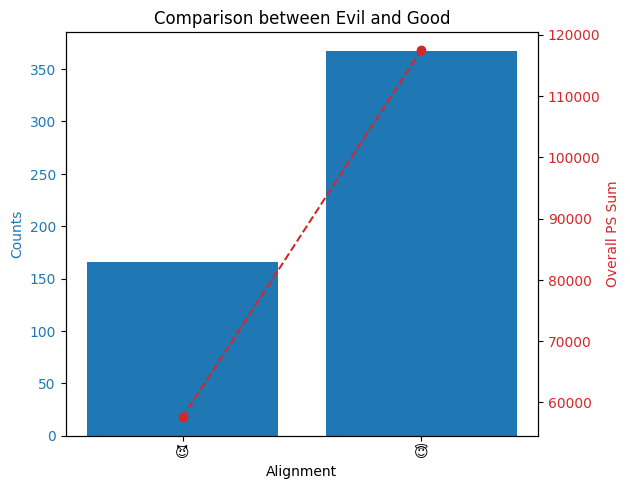

In [58]:
def compare_evil_vs_good(df):
    evil_df = df[df['Alignment'] == 'üòà']
    good_df = df[df['Alignment'] == 'üòá']
    
    evil_count = len(evil_df)
    good_count = len(good_df)
    evil_sum = evil_df['Overall PS'].sum()
    good_sum = good_df['Overall PS'].sum()

    categories = ['üòà', 'üòá']
    counts = [evil_count, good_count]
    sums = [evil_sum, good_sum]

    fig, ax1 = plt.subplots()

    color = 'tab:blue'
    ax1.set_xlabel('Alignment')
    ax1.set_ylabel('Counts', color=color)
    ax1.bar(categories, counts, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:red'
    ax2.set_ylabel('Overall PS Sum', color=color)
    ax2.plot(categories, sums, color=color, marker='o', linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.title('Comparison between Evil and Good')
    plt.show()

compare_evil_vs_good(df_cleaned_formatted)


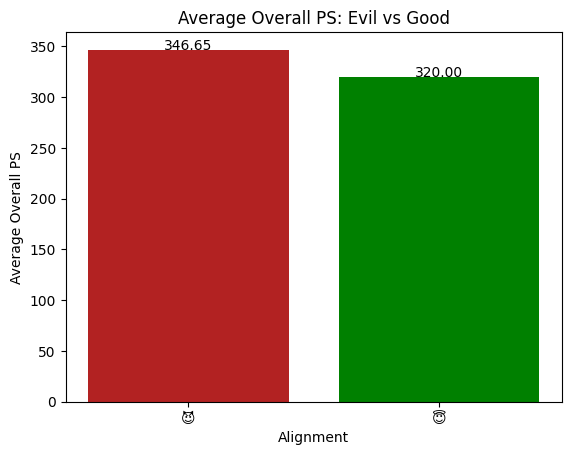

In [59]:
def compare_avg_evil_vs_good(df):
    evil_df = df[df['Alignment'] == 'üòà']
    good_df = df[df['Alignment'] == 'üòá']
    
    avg_evil_overall_ps = evil_df['Overall PS'].mean()
    avg_good_overall_ps = good_df['Overall PS'].mean()
    
    categories = ['üòà', 'üòá']
    averages = [avg_evil_overall_ps, avg_good_overall_ps]

    plt.bar(categories, averages, color=['firebrick', 'green'])
    plt.title('Average Overall PS: Evil vs Good')
    plt.xlabel('Alignment')
    plt.ylabel('Average Overall PS')
    
    for i, value in enumerate(averages):
        plt.text(i, value + 0.05, f'{value:.2f}', ha='center')
    
    plt.show()

compare_avg_evil_vs_good(df_cleaned_formatted)


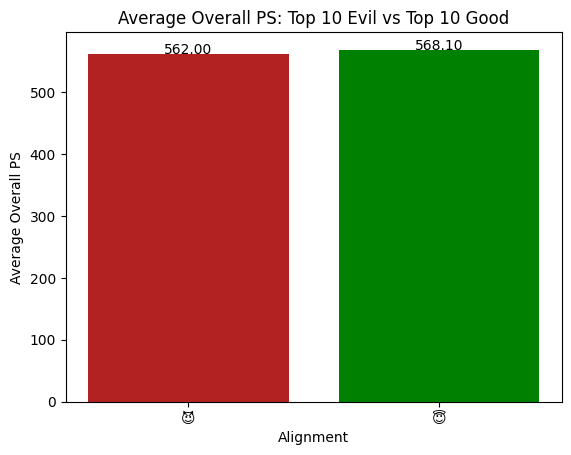

In [60]:
def compare_avg_top_10_evil_vs_good(df):
    top_10_evil = df[df['Alignment'] == 'üòà'].nlargest(10, 'Overall PS')
    top_10_good = df[df['Alignment'] == 'üòá'].nlargest(10, 'Overall PS')
    
    avg_top_10_evil_overall_ps = top_10_evil['Overall PS'].mean()
    avg_top_10_good_overall_ps = top_10_good['Overall PS'].mean()
    
    categories = ['üòà', 'üòá']
    averages = [avg_top_10_evil_overall_ps, avg_top_10_good_overall_ps]

    plt.bar(categories, averages, color=['firebrick', 'green'])
    plt.title('Average Overall PS: Top 10 Evil vs Top 10 Good')
    plt.xlabel('Alignment')
    plt.ylabel('Average Overall PS')

    for i, value in enumerate(averages):
        plt.text(i, value + 0.05, f'{value:.2f}', ha='center')

    plt.show()

compare_avg_top_10_evil_vs_good(df_cleaned_formatted)


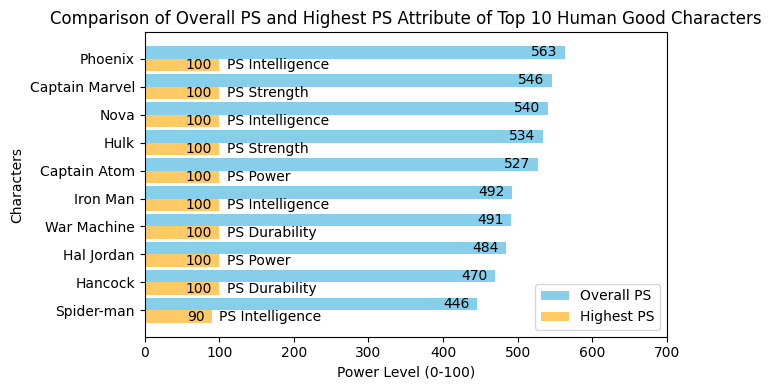

In [84]:
filtered_df = df_cleaned_formatted[(df_cleaned_formatted['Race'].isin(['Human', 'Human / Radiation', 'Mutant'])) & 
                                   (df_cleaned_formatted['Alignment'] == 'üòá')].nlargest(10, 'Overall PS')

names = filtered_df['Name']
overall_ps_values = filtered_df['Overall PS']
ps_attributes = ['PS Intelligence', 'PS Strength', 'PS Speed', 'PS Durability', 'PS Power', 'PS Combat']
highest_ps_values = filtered_df[ps_attributes].max(axis=1)

fig, ax = plt.subplots(figsize=(7, 4))

bar_width = 0.45
n_characters = len(names)
indices = np.arange(n_characters)

overall_bars = ax.barh(indices - bar_width/2, overall_ps_values, height=bar_width, color='skyblue', label='Overall PS')

highest_bars = ax.barh(indices + bar_width/2, highest_ps_values, height=bar_width, color='orange', alpha=0.6, label='Highest PS')

ax.set_yticks(indices)
ax.set_yticklabels(names)
ax.set_xlabel('Power Level (0-100)')
ax.set_ylabel('Characters')
ax.set_title('Comparison of Overall PS and Highest PS Attribute of Top 10 Human Good Characters')

ax.set_xticks(np.arange(0, 701, 100))

ax.invert_yaxis()

ax.legend(loc='lower right')

for i, bar in enumerate(highest_bars):
    ps_attribute = ps_attributes[np.argmax(filtered_df[ps_attributes].iloc[i].values)]
    ax.text(bar.get_width() + 10, bar.get_y() + bar.get_height() / 2, ps_attribute, va='center', color='black')

for bar in overall_bars:
    width = bar.get_width()
    ax.text(width - 10, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='right', color='black')

for bar in highest_bars:
    width = bar.get_width()
    ax.text(width - 10, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='right', color='black')

plt.tight_layout()
plt.show()




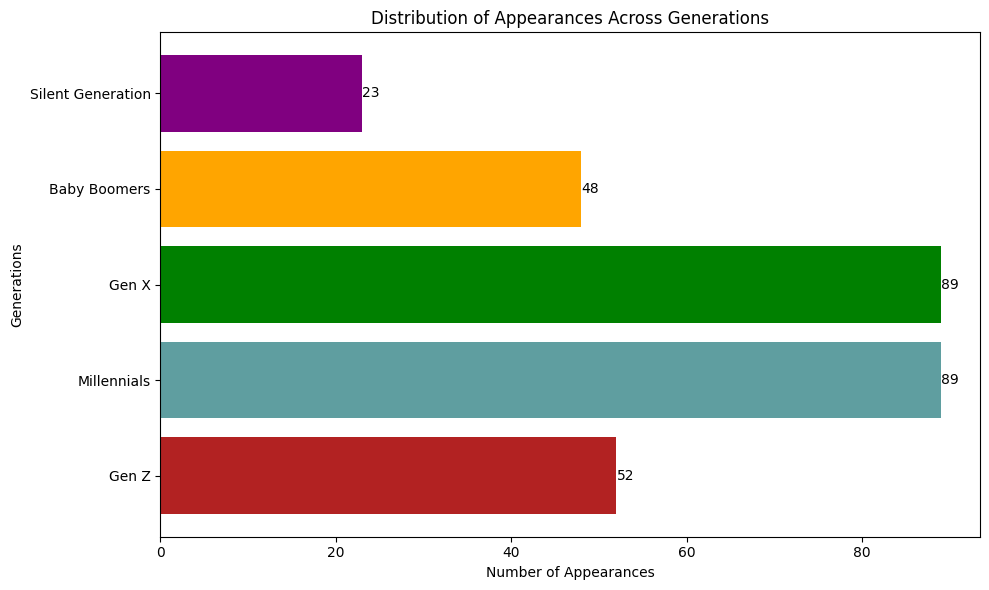

In [72]:
generations = {
    'Gen Z': range(2000, 2023),
    'Millennials': range(1981, 1999),
    'Gen X': range(1965, 1980),
    'Baby Boomers': range(1946, 1964),
    'Silent Generation': range(1928, 1946)
}

appearance_counts = {gen: 0 for gen in generations}

df_cleaned_formatted['Year'] = pd.to_numeric(df_cleaned_formatted['Year'], errors='coerce')

for gen, year_range in generations.items():
    appearance_counts[gen] = df_cleaned_formatted['Year'].between(year_range.start, year_range.stop - 1).sum()

plt.figure(figsize=(10, 6))
bars = plt.barh(list(appearance_counts.keys()), appearance_counts.values(), color=['firebrick', 'cadetblue', 'green', 'orange', 'purple'])

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', ha='left', va='center')

plt.xlabel('Number of Appearances')
plt.ylabel('Generations')
plt.title('Distribution of Appearances Across Generations')
plt.tight_layout()
plt.show()


## Extra - Game

In [90]:
def filter_heroes(df):
    print("Welcome to the hero selection tool!")
    print("Please define your filters for hero selection:")

    race = input("Enter the race of heroes (e.g., Human, Alien, etc.): ")
    alignment = input("Enter the alignment of heroes (e.g., üòá for good, üòà for evil): ")

    filtered_df = df[(df['Race'] == race) & (df['Alignment'] == alignment)]
    
    return filtered_df

def display_heroes(df):
    print("\nList of Heroes:")
    print(df[['Name', 'Overall PS', 'PS Intelligence', 'PS Strength', 'PS Speed', 'PS Durability', 'PS Power', 'PS Combat']])

def select_team(df):
    team = []
    total_overall_ps = 0
    
    while len(team) < 5:
        hero_name = input(f"\nChoose hero {len(team) + 1}: ")
        hero = df[df['Name'] == hero_name]
        
        if len(hero) == 0:
            print("Hero not found. Please choose from the list.")
        else:
            hero_overall_ps = hero['Overall PS'].values[0]
            if total_overall_ps + hero_overall_ps > 15000:
                print("Total overall PS exceeds 15000. Cannot add more heroes to the team.")
                break
            else:
                team.append(hero)
                total_overall_ps += hero_overall_ps
                print(f"{hero_name} added to the team.")
    
    return team

def main():
    try:
        filtered_df = filter_heroes(df_cleaned_formatted)
        
        display_heroes(filtered_df)
        
        team = select_team(filtered_df)
        
        print("\nSelected Team:")
        for hero in team:
            print(hero['Name'].values[0])
    
    except FileNotFoundError:
        print("File not found. Please provide a valid file path.")

if __name__ == "__main__":
    main()


Welcome to the hero selection tool!
Please define your filters for hero selection:
Enter the race of heroes (e.g., Human, Alien, etc.): Human
Enter the alignment of heroes (e.g., üòá for good, üòà for evil): üòà

List of Heroes:
                  Name  Overall PS  PS Intelligence  PS Strength  PS Speed  \
id                                                                           
6        Absorbing Man         405               38           80        25   
15         Alex Mercer         412               50           80        42   
60                Bane         351               88           38        23   
105        Black Manta         374               75           28        50   
120           Bloodaxe         440               63           80        33   
141           Bullseye         246               50           11        25   
172            Cheetah         210               38            8        42   
174        Cheetah Iii         529               88          100  